#WidBot Task 3 - Classification

### Connect To Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.0 Importing Packages

In [2]:
import pickle
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

## 2.0 Reading & Exploring Data

### 2.1 Reading Data

In [3]:
path = '/content/drive/MyDrive/Datasets/Wide Bot Task Dataset'
csvs = os.listdir(path)
df = pd.read_csv(os.path.join(path, csvs[0]))
df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,9d9ebd0204f811eb92ec646e69d991ea,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers
1,1,9e96ecc604f811eb836a646e69d991ea,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers
2,2,9fc1ec4204f811eb8619646e69d991ea,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers
3,3,a0a2fa9c04f811eb8580646e69d991ea,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers
4,4,a2d0124a04f811eba88f646e69d991ea,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers


### 2.2 concatenating Data

In [4]:
for index in range(1, len(csvs)):
  df1 = pd.read_csv(os.path.join(path, csvs[index]))
  df = pd.concat([df, df1], ignore_index=True, sort=False)

df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,9d9ebd0204f811eb92ec646e69d991ea,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers
1,1,9e96ecc604f811eb836a646e69d991ea,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers
2,2,9fc1ec4204f811eb8619646e69d991ea,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers
3,3,a0a2fa9c04f811eb8580646e69d991ea,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers
4,4,a2d0124a04f811eba88f646e69d991ea,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers


### 2.3 Extract Publish Year

In [5]:
df['publish year'] = 0
for index in range(len(df)):
  df['publish year'][index] = re.findall('\\d{4}',str(df['date'][index]))[0]

df['publish year'].unique()

<ipython-input-5-b4607e74ddf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publish year'][index] = re.findall('\\d{4}',str(df['date'][index]))[0]


array(['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    11000 non-null  int64 
 1   id            11000 non-null  object
 2   title         11000 non-null  object
 3   date          11000 non-null  object
 4   author        11000 non-null  object
 5   story         11000 non-null  object
 6   topic         11000 non-null  object
 7   publish year  11000 non-null  object
dtypes: int64(1), object(7)
memory usage: 687.6+ KB


### 2.3 Plotting targets distribution

faits-divers          1000
marocains-du-monde    1000
medias                1000
politique             1000
orbites               1000
regions               1000
sport                 1000
societe               1000
tamazight             1000
art-et-culture        1000
economie              1000
Name: topic, dtype: int64


<Axes: >

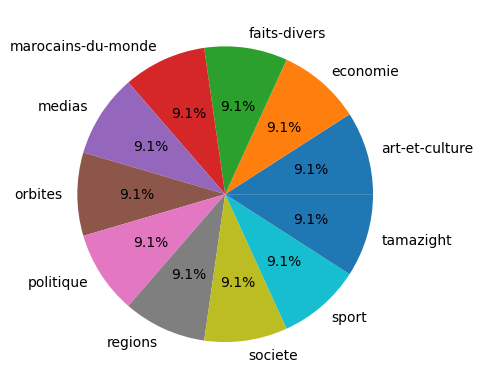

In [7]:
print(df['topic'].value_counts())
df.groupby('topic').size().plot(kind='pie',
                                   y="topic",
                                   label="",
                                   autopct='%1.1f%%')

#### From this pie chart, we can see that the data is balanced.

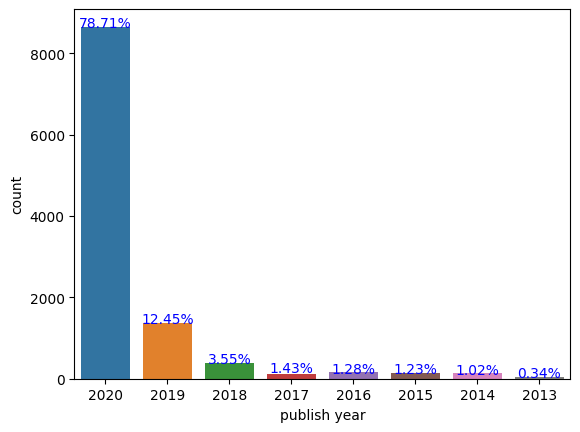

In [8]:
publish_years = sorted(df['publish year'].unique())
publish_year_values_count = df['publish year'].value_counts()
sn.countplot(x='publish year', data=df)
for index, publish_year in enumerate(publish_years):
  percentage = f'{100 * publish_year_values_count[index] / len(df):.2f}%'
  plt.text(index, publish_year_values_count[index], str(percentage), ha='center', color='blue', fontsize=10)
plt.show()

#### From this count plot, we can see that most of the stories were published in 2020.

## 3.0 Preprocessing Data

### 3.1 Converting targets to one hot vectors

In [9]:
targets = np.array(pd.get_dummies(df['topic']))

### 3.2 Cleaning and Preprocessing text

In [10]:
def clean_text(text: str) -> str:
  """
  Clean & preprocess `text` including:

  - removing quotation marks
  - removing digits and words containing digits
  - removing punctuations
  - removing ant consecutive spaces

  Parameters:
  ------------
  - text : str
    Text needed to be processed

  Returns:
  --------
  - cleaned_text : str
    A cleaned version of passed `text`
  """
  punc = '،؛.:-—ـ؟!«»()[]<>/\\^*&{}'
  text = re.sub("\'\w+", '', text)
  text = re.sub(r'\w*\d+\w*', '', text)
  for ele in text:
    if ele in punc:
        text = text.replace(ele, "")
  cleaned_text = re.sub('\s{2,}', " ", text).strip()

  return cleaned_text

In [11]:
df['clean_text'] = df['story'].apply(clean_text)

In [12]:
df.head()

,Unnamed: 0,id,title,date,author,story,topic,publish year,clean_text
0,0,9d9ebd0204f811eb92ec646e69d991ea,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers,2020,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...
1,1,9e96ecc604f811eb836a646e69d991ea,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers,2020,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...
2,2,9fc1ec4204f811eb8619646e69d991ea,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers,2020,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...
3,3,a0a2fa9c04f811eb8580646e69d991ea,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers,2020,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...
4,4,a2d0124a04f811eba88f646e69d991ea,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers,2020,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...


## 4.0 Splitting Data to training and testing parts

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], targets, test_size=0.2, stratify=df['topic'])

In [14]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8800,)
y_train shape: (8800, 11)
X_test shape: (2200,)
y_test shape: (2200, 11)


## 4.0 Splitting Data to training and testing parts

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], targets, test_size=0.2, stratify=df['topic'])

In [16]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8800,)
y_train shape: (8800, 11)
X_test shape: (2200,)
y_test shape: (2200, 11)


In [17]:
X_train.iloc[110]

'رفضٌ متواصلٌ عكسته خرجات "منتظمة" على مستوى مواقع التّواصل الاجتماعي لمضامين المذكّرة الوزارية المتعلّقة بالدّخول المدرسي المقبل خاصة في الجانب المتعلّق بتصويرِ الدّروس الافتراضية حيث اشترطت وزارة أمزازي أن تكون التّسجيلات التي سيبثّها الأساتذة لصالح التّلاميذ بجودة عالية وتقنيات "معقّدة"ووضعت وزارة التربية الوطنية سيناريوهين للدخول المدرسي المقبل كلاهما مرتبط بالوضعية الوبائية في البلاد بعد شهر من الآن فإذا استمرت الجائحة ومعها حالة الطوارئ الصحية المعمول بها منذ منتصف شهر مارس الماضي ستَتوزع الدراسة بين الدروس الحضورية والتعليم عن بُعدوألزمت وزارة التّربية الوطنية الأساتذة بتصوير وبثّ الدّروس الافتراضية بطريقة احترافية وجودة عالية وهو ما يعاكسُ إمكانات الأطر التّربوية التي تؤكّد أنها تجهل كيفية تشغيل الكاميرات وأنها لم تستفد من أيّ دورات تكوينية في مجالي المونطاج والتّصويرويقفُ الفاعل التّربوي عبد الوهاب السحيمي عند الضّبابية التي خلّفها المقرر الوزاري الصادر لتنظيم السنة الدراسية المقبلة مؤكّداً أنّ "الأساتذة كانوا ينتظرون صدور مذكرة وزارية تحدد بشكل واضح وصريح آليات وصيغ الدخول ال

## 5.0 Preparing Data

In [18]:
max_vocab = 2000
maxlen = 256

In [19]:
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [20]:
X_train_vectors = tokenizer.texts_to_sequences(X_train)
X_train_vectors = pad_sequences(X_train_vectors, maxlen=maxlen, padding='post', truncating='post')

In [21]:
with open('/content/drive/MyDrive/Datasets/Wide Bot Task Dataset/lstm_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
X_test_vectors = tokenizer.texts_to_sequences(X_test)
X_test_vectors = pad_sequences(X_test_vectors, maxlen=maxlen, padding='post', truncating='post')

## 6.0 Model Building

In [23]:
model = keras.Sequential([
    keras.layers.Embedding(
        max_vocab, 16, input_length=maxlen),
    keras.layers.Dropout(0.2),
    keras.layers.Conv1D(64, 5, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=4),
    keras.layers.LSTM(64),
    keras.layers.Dense(11, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 16)           32000     
                                                                 
 dropout (Dropout)           (None, 256, 16)           0         
                                                                 
 conv1d (Conv1D)             (None, 252, 64)           5184      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 63, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 11)                715       
                                                        

## 7.0 Model Compiling

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 8.0 Model Training

In [26]:
batch_size = 32
epochs = 20
history = model.fit(X_train_vectors, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vectors, y_test))

Epoch 1/20
275/275 [==============================] - 13s 41ms/step - loss: 2.1445 - accuracy: 0.1770 - val_loss: 1.9062 - val_accuracy: 0.2591
Epoch 2/20
275/275 [==============================] - 11s 39ms/step - loss: 1.7654 - accuracy: 0.2885 - val_loss: 1.6400 - val_accuracy: 0.3591
Epoch 3/20
275/275 [==============================] - 10s 36ms/step - loss: 1.4190 - accuracy: 0.4310 - val_loss: 1.4102 - val_accuracy: 0.4523
Epoch 4/20
275/275 [==============================] - 10s 38ms/step - loss: 1.4509 - accuracy: 0.4573 - val_loss: 2.0156 - val_accuracy: 0.2477
Epoch 5/20
275/275 [==============================] - 11s 39ms/step - loss: 1.5925 - accuracy: 0.3816 - val_loss: 1.4914 - val_accuracy: 0.4118
Epoch 6/20
275/275 [==============================] - 11s 42ms/step - loss: 1.2588 - accuracy: 0.5065 - val_loss: 1.3468 - val_accuracy: 0.4909
Epoch 7/20
275/275 [==============================] - 11s 39ms/step - loss: 1.1393 - accuracy: 0.5722 - val_loss: 1.2261 - val_accuracy:

## 9.0 Model's Performance Plotting

### 9.1 Plotting Loss vs. Validation Loss

<ipython-input-27-3d1da40ad812>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn'])


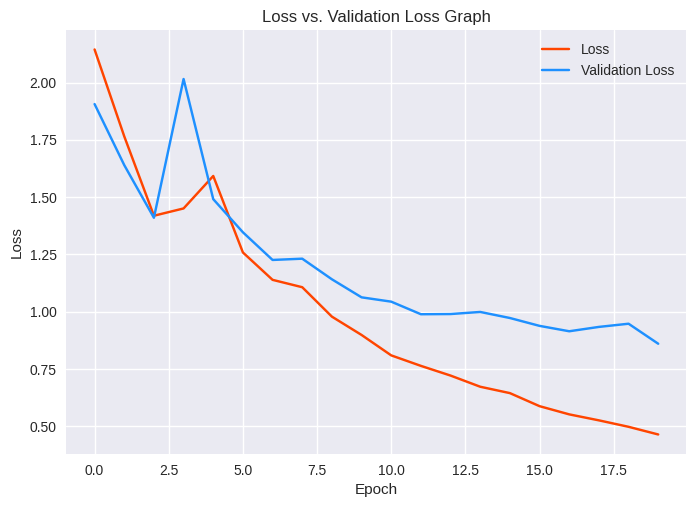

In [27]:
plt.style.use(['seaborn'])
plt.title("Loss vs. Validation Loss Graph")
plt.plot(history.history["loss"], color="orangered", label="Loss")
plt.plot(history.history["val_loss"], color="dodgerblue", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 9.2 Plotting Accuracy vs. Validation Accuracy

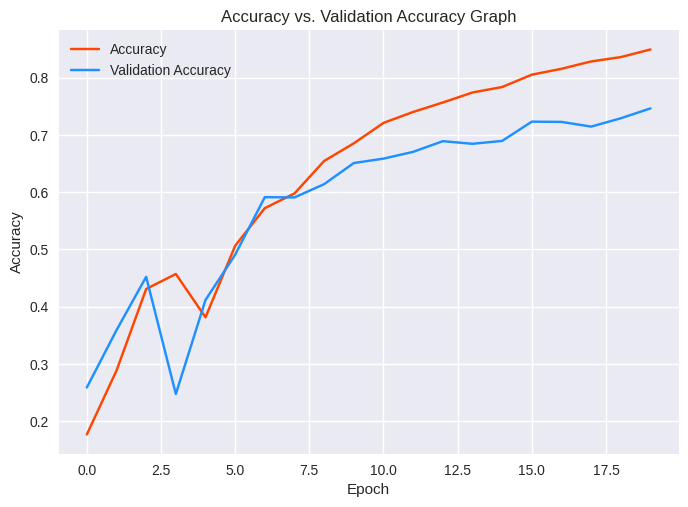

In [28]:
plt.title("Accuracy vs. Validation Accuracy Graph")
plt.plot(history.history["accuracy"], color="orangered", label="Accuracy")
plt.plot(history.history["val_accuracy"], color="dodgerblue", label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 9.3 Plotting Classification Report  

In [29]:
predictions = model.predict(X_test_vectors)
preds = np.where(predictions > 0.5, 1, 0)

69/69 [==============================] - 1s 13ms/step


In [30]:
cls_report = classification_report(y_test, preds)
print(cls_report)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       200
           1       0.72      0.72      0.72       200
           2       0.87      0.91      0.89       200
           3       0.76      0.74      0.75       200
           4       0.93      0.82      0.87       200
           5       0.62      0.28      0.39       200
           6       0.76      0.53      0.62       200
           7       0.75      0.65      0.70       200
           8       0.52      0.47      0.50       200
           9       0.97      0.96      0.97       200
          10       0.93      0.93      0.93       200

   micro avg       0.79      0.71      0.75      2200
   macro avg       0.78      0.71      0.74      2200
weighted avg       0.78      0.71      0.74      2200
 samples avg       0.71      0.71      0.71      2200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 9.4 Plotting Confusion Matrix

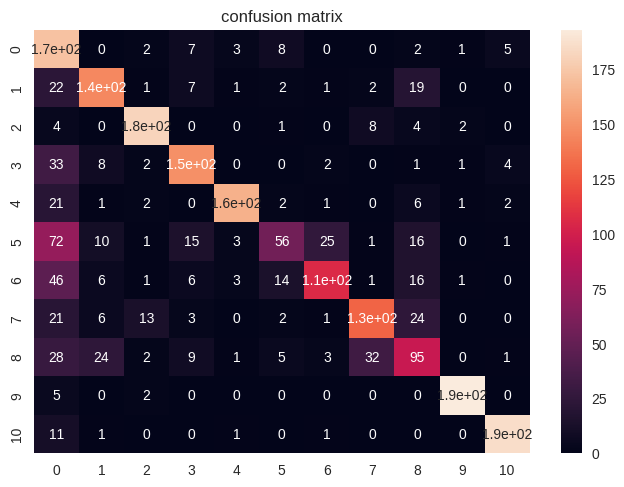

In [31]:
y_test_vector = np.argmax(y_test, axis=1)
y_pred_vector = np.argmax(preds, axis=1)
conf_matrix = confusion_matrix(y_test_vector, y_pred_vector)
sn.heatmap(conf_matrix, annot=True)
plt.title("confusion matrix")
plt.show()

## 10.0 Model Evaluation

In [32]:
loss_and_accuracy = model.evaluate(X_test_vectors, y_test)
print(f"loss: {loss_and_accuracy[0]:.4f}")
print(f"accuracy: {loss_and_accuracy[1]:.4f}")

69/69 [==============================] - 1s 11ms/step - loss: 0.8605 - accuracy: 0.7464
loss: 0.8605
accuracy: 0.7464
